# This assignment is based on implementing L1 and L2 loss functions using Logistic Regression

#### In Logistic Regression, unfortunately we can’t (or at least shouldn’t) use the same cost function Mean Squared Error as we did for linear regression. 
#### The reason is because our prediction function is non-linear. Squaring this prediction as we do in MSE results in a non-convex function with many local minimums. If our cost function has many local minimums, gradient descent may not find the optimal global minimum.
#### Instead of Mean Squared Error, we use a cost function called Cross-Entropy, also known as Log Loss. 

#### Least absolute deviations (L1) and Least square errors (L2) are the two standard loss functions, that decides what function should be minimized while learning from a dataset. 

#### L1 Loss function minimizes the absolute differences between the estimated values and the existing target values. 

#### On the other hand, L2 loss function minimizes the squared differences between the estimated and existing target values.

#### Importing all the necessary libraries

In [52]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### The data set is of students who will pass or fail depending on the number of hours they slept and studied
#### Loading the data set

In [53]:
dataset = pd.read_csv("/Users/saurabhkarambalkar/Desktop/machine.learning/data.csv")
X = dataset.iloc[:,[0,1]].values
y = dataset.iloc[:,2].values

#### Spliting the data

In [54]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#### Standardising the data for accurate predictions

In [55]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Now, we will implement L1 Loss Function
#### Training the Logistic Regression Model

In [56]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression("l1",random_state=0)
classifier1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Predicting test results

In [57]:
y_pred1 = classifier1.predict(X_test)
y_pred1

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

#### Creating Confusion Matrix

In [58]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_pred1)
cm1

array([[ 6,  2],
       [ 0, 12]])

#### Plotting the model for Training data set

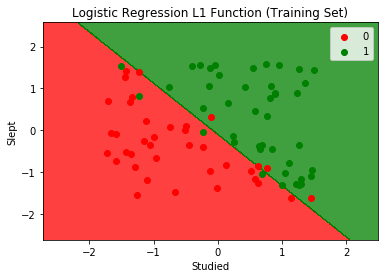

In [70]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_train,y_train

X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                   np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))

plt.contourf(X1,X2,classifier1.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
    
plt.title('Logistic Regression L1 Function (Training Set)')
plt.xlabel('Studied')
plt.ylabel('Slept')
plt.legend()
plt.show()

#### Plotting the model for Test data set

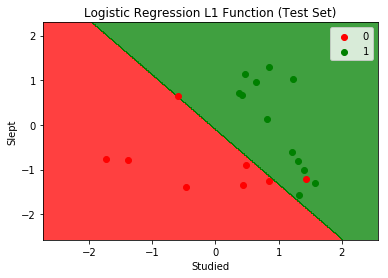

In [69]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_test,y_test

X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                   np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))

plt.contourf(X1,X2,classifier1.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
    
plt.title('Logistic Regression L1 Function (Test Set)')
plt.xlabel('Studied')
plt.ylabel('Slept')
plt.legend()
plt.show()

#### Calculating the accuracy of the model

In [61]:
accuracy1 = 1.0 - (float(np.count_nonzero(y_pred1-y_test)) / len(y_pred1-y_test))
accuracy1

0.9

### Now, we will implement L2 Loss Function
#### Training the Logistic Regression Model

In [63]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression("l2",random_state=0)
classifier2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Predicting the test results

In [64]:
y_pred2 = classifier2.predict(X_test)
y_pred2

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

#### Creating the Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test,y_pred2)
cm2

array([[ 6,  2],
       [ 0, 12]])

#### Ploting the graph for training data set

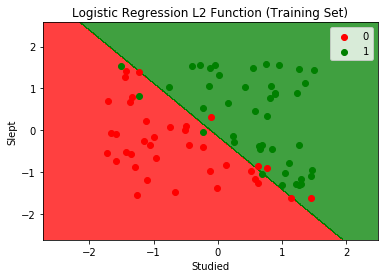

In [74]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_train,y_train

X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                   np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))

plt.contourf(X1,X2,classifier2.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
    
plt.title('Logistic Regression L2 Function (Training Set)')
plt.xlabel('Studied')
plt.ylabel('Slept')
plt.legend()
plt.show()

#### Ploting the graph for test data set

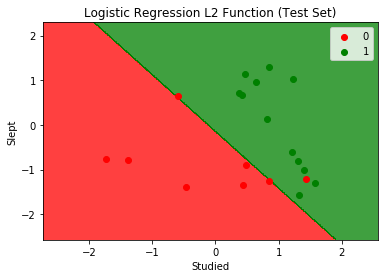

In [73]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_test,y_test

X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                   np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))

plt.contourf(X1,X2,classifier2.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
    
plt.title('Logistic Regression L2 Function (Test Set)')
plt.xlabel('Studied')
plt.ylabel('Slept')
plt.legend()
plt.show()

#### Calculating the accuracy of the model

In [68]:
accuracy2 = 1.0 - (float(np.count_nonzero(y_pred2-y_test)) / len(y_pred2-y_test))
accuracy2

0.9

### Though the accuracy of both the models are same, after observing the graphs we can say that L1 function fits best to our data set than L2 loss function.

# When to use L1 and L2 loss functions?

### L1 loss function is more robust and is generally not affected by outliers. On the contrary L2 loss function will try to adjust the model according to these outlier values, even on the expense of other samples. Hence, L2 loss function is highly sensitive to outliers in the dataset.
### Thus use L2 when there are minimum to no outliers in data and L1 when there are outliers present in the data.

# Citations :-

https://datascienceplus.com/building-a-logistic-regression-in-python-step-by-step/
http://rishy.github.io/ml/2015/07/28/l1-vs-l2-loss/
http://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#loss-cross-entropy
http://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html#binary-logistic-regression
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html